# **Lab 8: Supervised Learning Review**
---

### **Description**

In this week's lab, we will review everything we have seen so far this year. This is your chance to clarify any points of confusion and ultimately ensure your comfort with the fundamentals of supervised machine learning from exploratory data analysis to evaluating linear regression models.

<br>

### **Structure**

**Part 1**: [[OPTIONAL] Exploratory Data Analysis Review](#p1)

**Part 2**: [[OPTIONAL] Data Visualization Review](#p2)

**Part 3**: [[OPTIONAL] Linear Regression Review](#p3)

**Part 4**: [2015 World Happiness Report Project](#p4)


<br>

### **Learning Objectives**

By the end of this lab, you will:
* Understand how to perform exploratory data analysis before applying ML.
* Understand how to implement and evaluate Linear Regression models in sklearn.

<br>

### **Resources**
* [EDA with pandas Cheat Sheet](https://docs.google.com/document/d/1xnKJsii1AsRH2t22XtrAh7FzSFGqAR0hAmW4oLYM4MI/edit?usp=drive_link)

* [Data Visualization with matplotlib](https://docs.google.com/document/d/1_3hzeIBPvcT6VC-eK-DDGVsKUvdVSvylNepoSLn2-T4/edit?usp=drive_link)

* [Linear Regression with sklearn Updated](https://docs.google.com/document/d/1DPUqouqGKeAYBfNBoHNsKRoQGXfD7mjUAvjjK0VsLbc/edit?usp=drive_link)



<br>

**Run the code below before continuing.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

<a name="p1"></a>

---
## **Part 1: [OPTIONAL] Exploratory Data Analysis Review**
---


**Run the code cell below to create the DataFrame.**

In [ ]:
# Create a Pandas dataframe from the dictionary
df = pd.DataFrame({'U.S. State': ['California', 'Florida', 'Indiana', 'Texas', 'Pennsylvania'],
        'Population (in millions)': [38, 21, 6.5, 28, 13],
        'Capitol': ['Sacramento', 'Tallahassee', 'Indianapolis', 'Austin', 'Harrisburg'],
        'GDP ($ in billions)': [3700, 1070, 352, 1876, 726]})

#### **Problem #1.1**

What does `.head()` tell you about this DataFrame?

##### **Solution**

In [ ]:
df.head(3)

,U.S. State,Population (in millions),Capitol,GDP ($ in billions)
0,California,38.0,Sacramento,3700
1,Florida,21.0,Tallahassee,1070
2,Indiana,6.5,Indianapolis,352


#### **Problem #1.2**

What is the datatype of `Population (in millions)`?

##### **Solution**

In [ ]:
# float
df.dtypes

#### **Problem #1.3**

What is the average `Population (in millions)` size among the U.S. states in the dataset?

##### **Solution**

In [ ]:
#21.3 million
df['Population (in millions)'].mean()

#OR

df.describe()

#### **Problem #1.4**

Explore rows 4 and 5. What are the U.S. States listed?

##### **Solution**

In [ ]:
#Texas and Pennsylvania

df.iloc[3:5]

,U.S. State,Population (in millions),Capitol,GDP ($ in billions)
3,Texas,28.0,Austin,1876
4,Pennsylvania,13.0,Harrisburg,726


#### **Problem #1.5**

Print all of the unique values for `GDP ($ in billions)`.

##### **Solution**

In [ ]:
df['GDP ($ in billions)'].unique()

array([3700, 1070,  352, 1876,  726])

#### **Problem #1.6**

What are the column names in the dataset?

In [ ]:
# column names

##### **Solution**

In [ ]:
df.columns

Index(['U.S. State', 'Population (in millions)', 'Capitol',
       'GDP ($ in billions)'],
      dtype='object')

#### **Problem #1.7**

What is the total population across all states?

In [ ]:
# total population

##### **Solution**

In [ ]:
# 106.5 million
df['Population (in millions)'].sum()

106.5

#### **Problem #1.8**

Which is the highest GDP in the dataset?

In [ ]:
# highest GDP

##### **Solution**

In [ ]:
# 3.7 trillion
df['GDP ($ in billions)'].describe()

count       5.000000
mean     1544.800000
std      1329.776372
min       352.000000
25%       726.000000
50%      1070.000000
75%      1876.000000
max      3700.000000
Name: GDP ($ in billions), dtype: float64

#### **Problem #1.9**

What is the average population of the states?

In [ ]:
# average population

##### **Solution**

In [ ]:
# 21.3 million
df['Population (in millions)'].mean()

21.3

#### **Problem #1.10**

What is the `Population (in millions)` for the 3rd state in the dataset?

In [ ]:
# population of 3rd state

##### **Solution**

In [ ]:
# 6.5 million
df.iloc[2]

U.S. State                       Indiana
Population (in millions)             6.5
Capitol                     Indianapolis
GDP ($ in billions)                  352
Name: 2, dtype: object

#### **Problem #1.11**

Which states are included in this dataset?

In [ ]:
# list of states

##### **Solution**

In [ ]:
# California, Florida, Indiana, Texas, Pennsylvania
df['U.S. State'].unique()

array(['California', 'Florida', 'Indiana', 'Texas', 'Pennsylvania'],
      dtype=object)

#### **Problem #1.12**

What is the range of GDP values among the states?

In [ ]:
# range of GDP values

##### **Solution**

In [ ]:
# 352 billion to 3.7 trillion
df['GDP ($ in billions)'].describe()

count       5.000000
mean     1544.800000
std      1329.776372
min       352.000000
25%       726.000000
50%      1070.000000
75%      1876.000000
max      3700.000000
Name: GDP ($ in billions), dtype: float64

#### **Problem #1.13**

How many states have a population greater than 20 million?

In [ ]:
# list of states with population greater than 20 million


##### **Solution**

In [ ]:
# California, Florida, Texas
df.loc[df['Population (in millions)'] > 20]

,U.S. State,Population (in millions),Capitol,GDP ($ in billions)
0,California,38.0,Sacramento,3700
1,Florida,21.0,Tallahassee,1070
3,Texas,28.0,Austin,1876


#### **Problem #1.14**

Explore the last row in the dataset.

In [ ]:
# last row

##### **Solution**

In [ ]:
df.iloc[4]

U.S. State                  Pennsylvania
Population (in millions)            13.0
Capitol                       Harrisburg
GDP ($ in billions)                  726
Name: 4, dtype: object

### **[ADVANCED] Problem #1.15**

What is the average `GDP per capita` for the states? Divide `GDP per capita` by `Population (in millions)`.

In [ ]:
# average GDP per capita

##### **Solution**

In [ ]:
# 65.06
df['GDP per capita'] = df['GDP ($ in billions)'] / df['Population (in millions)']
df['GDP per capita'].mean()

65.06416040100251

<a name="p2"></a>

---
## **Part 2: [OPTIONAL] Data Visualization Review**
---

**Run the cell below to load in the data.**

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS9jPkeKJ8QUuAl-fFdg3nJPDP6vx1byvIBl4yW8UZZJ9QEscyALJp1eywKeAg7aAffwdKP63D9osF1/pub?gid=169291584&single=true&output=csv"
movie_df = pd.read_csv(url)

movie_df.drop_duplicates(inplace=True)

mean_runtime = movie_df['Runtime'].mean()
movie_df['Runtime'] = movie_df['Runtime'].fillna(mean_runtime)

movie_df = movie_df.rename(columns = {"Runtime": "Runtime (min)"})
movie_df = movie_df.astype({"Runtime (min)": "int64"})

movie_df.head()

#### **Problem #2.1**

Create a scatterplot using `Runtime (min)` as the x-axis value and `Gross` as the y-axis value.

Make sure to include a meaningful:
* `Title`: "Gross Money vs. Runtime:
* `X-axis`: "Gross (USD)"
* `Y-axis`: "Runtime (min)"

##### **Solution**

In [ ]:
plt.scatter(movie_df['Runtime (min)'], movie_df['Gross'])

plt.title("Gross Money vs. Runtime")
plt.xlabel('Gross (USD)')
plt.ylabel('Runtime (min)')

plt.show()

#### **Problem #2.2**

Create a scatterplot using `Released_Year` as the x-axis value and `Runtime (min)` as the y-axis value.

Make sure to include a meaningful:
* `Title`: "Runtime vs. Released_Year"
* `X-axis`: "Year"
* `Y-axis`: "Runtime (min)"

##### **Solution**

In [ ]:
plt.scatter(movie_df['Released_Year'], movie_df['Runtime (min)'])

plt.title("Gross Money vs. Runtime")
plt.xlabel('Year')
plt.ylabel('Runtime (min)')

plt.show()

#### **Problem #2.3**

Create a *lineplot* using `Runtime (min)` as the x-axis value and `Gross` as the y-axis value.

Make sure to include a meaningful:
* Title, ex: `'Gross Money vs. Runtime'`.
* X-axis label including units `'min'`.
* Y-axis label including units `'USD'`.

<br>

**NOTE**: This is not going to be a particularly helpful graph (the scatter plot is a better choice), but we oftentimes will not know this ahead of time. A lot of EDA and visualizations involves trying a number of things and seeing what is useful.

##### **Solution**

In [ ]:
plt.plot(movie_df['Runtime (min)'], movie_df['Gross'])

plt.title("Gross Money vs. Runtime")
plt.xlabel('Runtime (min)')
plt.ylabel('Gross (USD)')

plt.show()

#### **Problem #2.4**

Create a *lineplot* using `Released_Year` as the x-axis value and `Average Gross in Year` as the y-axis value.

Make sure to include a meaningful:
* Title, ex: `'Average Gross Money vs. Released Year'`.
* X-axis label.
* Y-axis label including units `'USD'`.

In [ ]:
mean_gross = movie_df.groupby(# COMPLETE THIS LINE


##### **Solution**

In [ ]:
mean_gross = movie_df.groupby('Released_Year')['Gross'].mean()

plt.plot(mean_gross.index, mean_gross)

plt.title("Gross Money vs. Released Year")
plt.xlabel('Released Year')
plt.ylabel('Gross (USD)')

plt.show()

#### **Problem #2.5**

Create a bar plot of the number of movies released per year.

Use the DataFrame provided, `movies_per_year` and make sure to include a meaningful:
* Title.
* X-axis label.
* Y-axis label.

In [ ]:
movies_per_year = movie_df['Released_Year'].value_counts()

plt.bar(movies_per_year.index, # COMPLETE THIS CODE

##### **Solution**

In [ ]:
movies_per_year = movie_df['Released_Year'].value_counts()

plt.bar(movies_per_year.index, movies_per_year)

plt.title('Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.show()

#### **Problem #2.6**

Create a bar plot of the number of Dramas released per year.

Use the DataFrame provided, `movies_per_year` and make sure to include a meaningful:
* Title.
* X-axis label.
* Y-axis label.

<br>

**Hint**: Recall that you can use `.loc[CRITERIA, :]` to find all data matching given criteria and the example in Problem #6 for finding the number of movies realeased per year.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
drama_df = movie_df.loc[movie_df["Genre"] == "Drama", :]
dramas_per_year = drama_df['Released_Year'].value_counts()

plt.bar(dramas_per_year.index, dramas_per_year)

plt.title('Dramas Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Dramas')

plt.show()

<a name="p3"></a>

---
## **Part 3: [OPTIONAL] Linear Regression Review**
---

In this part, we will model the relationship between the numerical features and the `Runtime (min)` variable as the label using linear regression.

#### **Step #1: Load the data**

Reload the data below, even if you did this in Part 2.

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS9jPkeKJ8QUuAl-fFdg3nJPDP6vx1byvIBl4yW8UZZJ9QEscyALJp1eywKeAg7aAffwdKP63D9osF1/pub?gid=169291584&single=true&output=csv"
movie_df = pd.read_csv(url)

movie_df.drop_duplicates(inplace=True)

mean_runtime = movie_df['Runtime'].mean()
movie_df['Runtime'] = movie_df['Runtime'].fillna(mean_runtime)

movie_df = movie_df.rename(columns = {"Runtime": "Runtime (min)"})
movie_df = movie_df.astype({"Runtime (min)": "int64"})

movie_df.head()

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


#### **Step #2: Decide independent and dependent variables**

Examining the DataFrame, choose only the numerical variables (other than `Runtime (min)`) for the features and `Runtime (min)` for the label.


In [ ]:
features = # COMPLETE THIS CODE
label = # COMPLETE THIS CODE

##### **Solution**

In [ ]:
features = movie_df[['Released_Year', 'IMDB_Rating', 'No_of_Votes', 'Gross']]
label = movie_df['Runtime (min)']

#### **Step #3: Split data into training and testing data**

Split the data using a 80 / 20 split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS CODE

##### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

#### **Step #4: Import your model**

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step #5: Initialize your model and set hyperparameters**


Linear regression takes no hyperparameters, so just initialize the model.

##### **Solution**

In [ ]:
LR = LinearRegression()

#### **Step #6: Fit your model, test on the testing data, and create a visualization if applicable**

##### **Solution**

In [ ]:
LR.fit(X_train, y_train)
pred = LR.predict(X_test)

##### **Create a visualization**

Use `y_test` and your `prediction` from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be. The code has already been given to you.
```
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")
```

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(# COMPLETE THIS CODE
plt.plot(# COMPLETE THIS CODE, '--k', label="Correct prediction")\

plt.xlabel(# COMPLETE THIS CODE
plt.ylabel(# COMPLETE THIS CODE
plt.title(# COMPLETE THIS CODE


plt.legend()

###### **Solution**

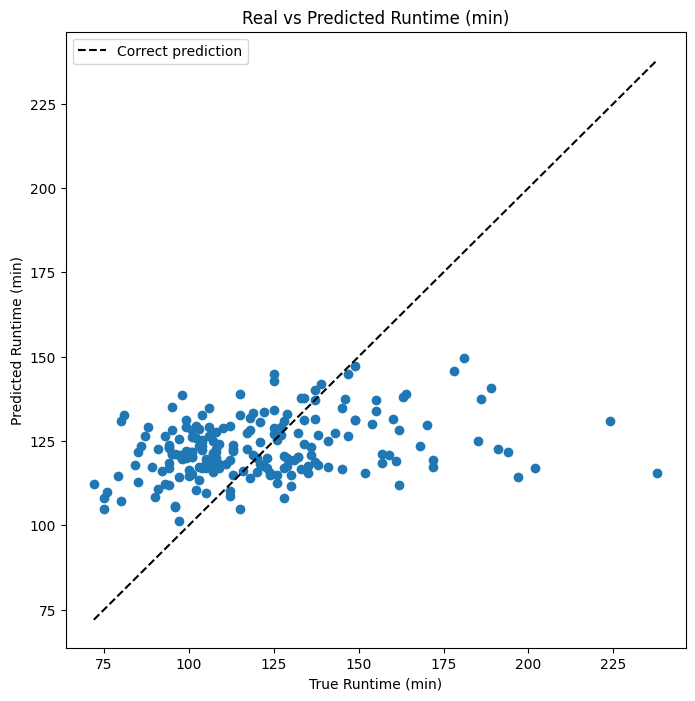

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")

plt.xlabel('True Runtime (min)')
plt.ylabel('Predicted Runtime (min)')
plt.title("Real vs Predicted Runtime (min)")

plt.legend()

#### **Step #7: Evaluate your model**

Use mean squared error and the R2 score as the evaluation metrics.


##### **Solution**

In [ ]:
mean_squared_error(y_test, pred)

742.503745089591

In [ ]:
r2_score(y_test, pred)

0.09461668798421152

#### **Step #8: Use the model**

Using the model we created, predict the disease progression of two new patients:

* Patient 1:  age 45, bmi of 26.3, and average blood pressure of 98

* Patient 2:  age 39, bmi of 22.7, and average blood pressure of 114

**NOTE**: you must create a dataframe containing with the information of the new patients:

```python
new_patient_data = pd.DataFrame(new_patient_data_here, columns =["AGE", "BMI", "BP"])
```

In [ ]:
movie_df.describe()

,Released_Year,Runtime (min),IMDB_Rating,No_of_Votes,Gross
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,1991.221000,122.903000,7.949300,2.736929e+05,6.245165e+07
std,23.285669,28.071865,0.275491,3.273727e+05,1.051148e+08
min,1920.000000,45.000000,7.600000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,5.552625e+04,2.351568e+06
50%,1999.000000,119.000000,7.900000,1.385485e+05,1.791714e+07
75%,2009.000000,137.000000,8.100000,3.741612e+05,7.410387e+07
max,2020.000000,321.000000,9.300000,2.343110e+06,9.366622e+08


#####**Solution**

In [ ]:
# Prediction
new_movie_data = pd.DataFrame([[1999, 7.9, 100000, 8000000],[2007, 8.5, 1000000, 10000000]], columns = ['Released_Year', 'IMDB_Rating', 'No_of_Votes', 'Gross'])
movie_prediction = LR.predict(new_movie_data)
movie_prediction

# Movie 1: predicted runtime of 124...
# Movie 2: predicted runtim of 139...

array([124.417143  , 139.18909745])

<a name="p4"></a>

---
## **Part 4: 2015 World Happiness Report Project**
---

### **Description**
In this project, you will use what you have learned so far about the machine learning process and Linear Regression to analyze the official 2015 World Happiness Report from the United Nations. In particular, you will explore and visualize this data and then model the Happiness Score based on the variables reported in this dataset.

<br>


### **Overview**
For this project, you are given data collected for the 2015 UN Happiness Report. The 2015 Happiness Report, also known as the World Happiness Report 2015, is a publication that presents rankings of countries based on their levels of happiness and well-being. The report is a collaborative effort between the Sustainable Development Solutions Network (SDSN) and the Earth Institute at Columbia University, with contributions from various researchers and experts.

<br>

The report includes rankings of 158 countries based on the "World Happiness Index," which is calculated using survey data from the Gallup World Poll and other sources. The index combines factors such as GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption to assess overall happiness levels.

<br>

The 2015 Happiness Report sheds light on the relationship between happiness, well-being, and sustainable development, emphasizing the importance of incorporating measures of happiness into policy-making and development strategies. It provides valuable insights into global happiness levels, highlighting the factors that contribute to happiness and offering recommendations for policymakers and individuals to improve overall well-being.

<br>

 Everything you need is provided below. But, if you are curious to learn more the [official source can be found here](https://worldhappiness.report/ed/2015/#appendices-and-data). Here is a list of variables for your reference:

* `Country`: The country that the data corresponds to.

* `Region`: The region that this country is classified as belong to.

* `Happiness Score`: A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

* `GDP`: The extent to which GDP contributes to the calculation of the Happiness Score.

* `Social Support`: The extent to which Family contributes to the calculation of the Happiness Score

* `Health Life Expectancy`: The extent to which Life expectancy contributed to the calculation of the Happiness Score

* `Freedom`: The extent to which Freedom contributed to the calculation of the Happiness Score.

* `Corruption Perception`: The extent to which Perception of Corruption contributes to Happiness Score.

* `Generosity`: A model of the national average of response to the question “Have you donated money to a charity in the past month?” on GDP per
capita.

**NOTE**: All numerical variables except `Happiness Score` have already been standardized.

<br>

### **Key questions to answer**
1. How do these variables, such as `Generosity` or `Freedom`, influence a country's `Happiness Score`?

2. In 2015, which nation had the highest `Happiness Score`? Which nation had the lowest `Happiness Score`?

3. What patterns can be observed visually? What patterns can be observed with deeper data exploration?

<a name="p4.1"></a>

---
### **Part 4.1: Data Exploration, Wrangling, and Visualization**
---

In this part, you will load in and explore the dataset for this project. This will involve using functions from pandas as well as reading source material to understand the data that you are working with.

**NOTE**: In most real world situations, you will not do data exploration, wrangling, and visualization separately as we have done in the past. As such, you will simply be asked to perform tasks throughout this section without explicitly distinguishing between exploration, wrangling, and visualization.

<br>

**Run the code below to load in the data.**

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSUoGLZ90Qr6A5-DmdYD30CIEwMqIAmtWSbdcLgi10u5WoCtCuj_RuSm7wDsFsfcwPGRB6ZZDduCxpO/pub?gid=108149846&single=true&output=csv"

happy_df = pd.read_csv(url)

#### **Problem #4.1.1**

Spend a few minutes getting familiar with the data. Some things to consider: how many instances are there? How many features? What are the features' datatypes?

##### **Solution**

In [ ]:
happy_df.head()

,Country,region,Happiness Score,GDP,Social_support,Healthy Life_Expectancy,Freedom,corruptionperception,Generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


#### **Problem #4.1.2**

This data currently has no consistent naming convention for columns, which is very bad practice. So, rename each column to be of the style, `'Column Name'`, where each word is separated by a space (not an underscore, slash, or anything else) and starts uppercase. Furthermore, make sure all words are spelled correctly.

<br>

**Hint**: It may make you life easier to quickly print the current column names here using the `.columns` attribute.

##### **Solution**

In [ ]:
renaming = {'region': 'Region', 'Social_support': 'Social Support', 'Healthy Life_Expectancy': 'Healthy Life Expectancy', 'corruptionperception': 'Corruption Perception'}
happy_df = happy_df.rename(columns = renaming)

happy_df.columns

Index(['Country', 'Region', 'Happiness Score', 'GDP', 'Social Support',
       'Healthy Life Expectancy', 'Freedom', 'Corruption Perception',
       'Generosity'],
      dtype='object')

#### **Problem #4.1.3**

Drop any duplicate rows.

##### **Solution**

In [ ]:
happy_df.drop_duplicates(inplace = True)

#### **Problem #4.1.4**

Determine the datatypes of each feature. Determine the number of non-null values in each column.

##### **Solution**

In [ ]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 161
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  158 non-null    object 
 1   Region                   157 non-null    object 
 2   Happiness Score          157 non-null    float64
 3   GDP                      158 non-null    float64
 4   Social Support           158 non-null    float64
 5   Healthy Life Expectancy  157 non-null    float64
 6   Freedom                  158 non-null    float64
 7   Corruption Perception    158 non-null    float64
 8   Generosity               158 non-null    float64
dtypes: float64(7), object(2)
memory usage: 12.3+ KB


#### **Problem #4.1.5**

You should have seen from Problem #1.4 that there are 3 columns with null values. We need to either impute by filling with the average or drop the rows with null values.


Let's deal with these columns by type, specifically:
1. Impute or drop the numerical null values.
2. Impute or drop the object (string) null values.

##### **1. Impute or drop the numerical null values.**

Complete the code below to *drop* the numerical null values. There's an argument for dropping or imputing, but dropping is a safer choice that does not rely on making any assumptions about these variables.

In [ ]:
happy_df = happy_df.dropna(axis = 0, how='any', subset = [# COMPLETE THIS LINE

###### **Solution**

In [ ]:
happy_df = happy_df.dropna(axis = 0, how='any', subset = ['Happiness Score', 'Healthy Life Expectancy'])

##### **2. Impute or drop the object (string) null values.**

Complete the code below to *impute* the object (string) null value(s). This is something we can look up, so it's completely reasonable to fill in the missing values manually and not have to sacrifice more data points.

<br>

**NOTE**: You will likely need to use the following three commands to accomplish this:

1. `happy_df[happy_df['column name'].isnull()]`: Print the specific data point(s) with a null value for `'column name'`.
2. `happy_df['column name'].unique()`: Print the possible values that we could use to fill in the null value found above.
3. `happy_df.loc[happy_df['column name'].isnull(), 'column name'] = 'non-null value'`: Fill in the null value with a new value. This should be the best option from the list of unique values found above.

###### **Solution**

In [ ]:
happy_df[happy_df['Region'].isnull()]

,Country,Region,Happiness Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption Perception,Generosity
64,Libya,NaN,5.754,1.13145,1.11862,0.7038,0.41668,0.11023,0.18295


In [ ]:
happy_df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       nan, 'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [ ]:
happy_df.loc[happy_df['Region'].isnull(), 'Region'] = 'Middle East and Northern Africa'

#### **Problem #4.1.6**

Now that the data should be clean, take some time to understand the variables in this dataset, by looking at the [official statistical appendix/codebook here](https://s3.amazonaws.com/happiness-report/2015/StatisticalAppendixWHR3-April-16-2015.pdf) and answering the multiple choice questions below.

You will only need to refer to the first 2.5 pages of information, until they start mentioning the "expanded data set". You do not need to read anything after this.

<br>

**1. Which of the following best describes the `Happiness Score`?**

>**a.** We can also call this measure the "life ladder”.

>**b.** We can also call this measure the “objective well-being”.

>**c.** This is a measure of how many ladders people own in a country on average. The more ladders, the happier the people.

>**d.** Respondents were asked how happy they were on a scale of 1 - 10.

<br>

**2. How is `Social Support` measured?**

>**a.** This represents the average of responses on a scale of 1 - 10.

>**b.** This is measured differently for each country.

>**c**. Respondents were asked, “If you were in trouble, would you have support?”

>**d.** Respondents were asked, “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

<br>

**3. How is `Freedom` measured?**

>**a.** This represents the average of responses on a scale of 1 - 10.

>**b.** This is measured differently for each country.

>**c**. Respondents were asked, “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

>**d.** Respondents were asked, “How free are you?”

In [ ]:
# ENTER YOUR ANSWER TO 1 HERE

In [ ]:
# ENTER YOUR ANSWER TO 2 HERE

In [ ]:
# ENTER YOUR ANSWER TO 3 HERE

##### **Solution**

1. a
2. d
3. c

#### **Problem #4.1.7**

Determine the average (mean) and standard deviation (std) of the numerical variables.

##### **Solution**

In [ ]:
happy_df.describe()

,Happiness Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption Perception,Generosity
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.360750,0.844602,0.988929,0.628669,0.428004,0.143960,0.236874
std,1.142177,0.403282,0.273001,0.247780,0.150628,0.120321,0.127258
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.517750,0.539453,0.854692,0.437897,0.326865,0.062105,0.148800
50%,5.203000,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.193250,1.155523,1.210735,0.809837,0.547057,0.179565,0.307547
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


#### **Problem #4.1.8**

Determine all the regions that were included in this dataset.

##### **Solution**

In [ ]:
happy_df["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

#### **Problem #4.1.9**

Complete the code below to create a new feature called `Region Encoded` that encodes the regions into numerical values.

In [ ]:
region_list = # COMPLETE THIS LINE
region_map = {region_list[i]: i for i in range(len(region_list))}

happy_df['Region Encoded'] = # COMPLETE THIS LINE

happy_df.head()

##### **Solution**

In [ ]:
region_list = happy_df["Region"].unique()
region_map = {region_list[i]: i for i in range(len(region_list))}

happy_df['Region Encoded'] = happy_df['Region'].map(region_map)

happy_df.head()

,Country,Region,Happiness Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption Perception,Generosity,Region Encoded
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1


#### **Problem #4.1.10**

Let's visualize some of the data and see if we can discover some relationships. Specifically, create bar graphs of `Happiness Score` for the countries in several different regions: `"Middle East and Northern Africa"`, `"Southern Asia"`, and `"North America"`.


**NOTE:** Some of the code has already been provided for the first example to help you get started.

##### **Middle East and Northern Africa**

In [ ]:
x = happy_df[happy_df["Region"] == # COMPLETE THIS LINE
y = # COMPLETE THIS LINE

plt.# COMPLETE THIS LINE

plt.title(# COMPLETE THIS LINE
plt.xlabel(# COMPLETE THIS LINE
plt.ylabel(# COMPLETE THIS LINE
plt.xticks(rotation = 90)

plt.show()

###### **Solution**

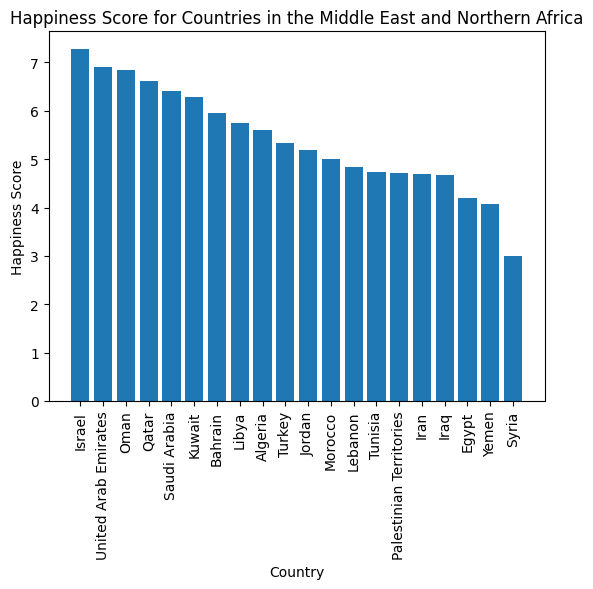

In [ ]:
x = happy_df[happy_df["Region"] == "Middle East and Northern Africa"]["Country"]
y = happy_df[happy_df["Region"] == "Middle East and Northern Africa"]["Happiness Score"]

plt.bar(x, y)

plt.title("Happiness Score for Countries in the Middle East and Northern Africa")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation = 90)

plt.show()

##### **Southern Asia**

###### **Solution**

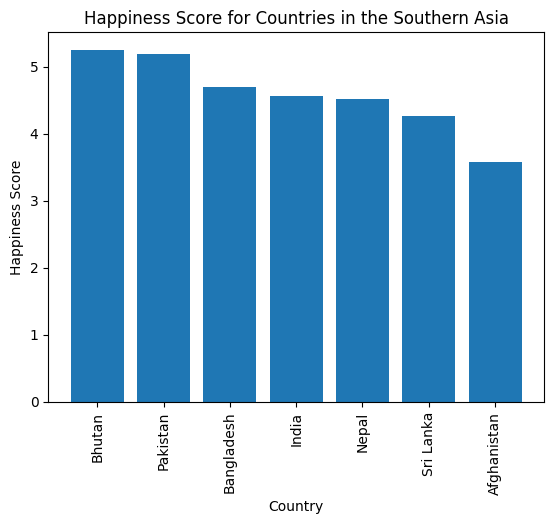

In [ ]:
x = happy_df[happy_df["Region"] == "Southern Asia"]["Country"]
y = happy_df[happy_df["Region"] == "Southern Asia"]["Happiness Score"]

plt.bar(x, y)

plt.title("Happiness Score for Countries in the Southern Asia")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation = 90)

plt.show()

##### **North America**

###### **Solution**

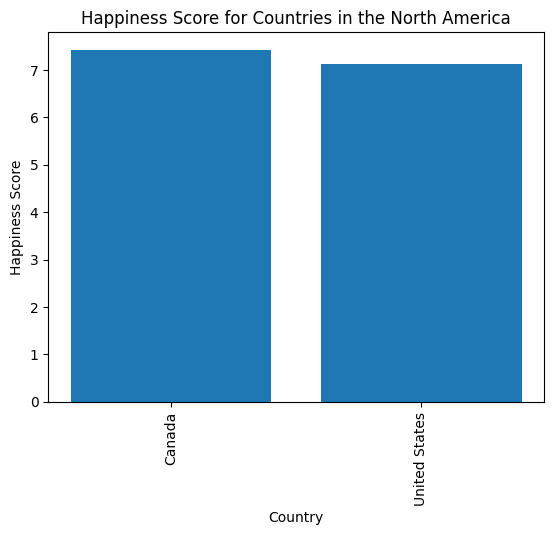

In [ ]:
x = happy_df[happy_df["Region"] == "North America"]["Country"]
y = happy_df[happy_df["Region"] == "North America"]["Happiness Score"]

plt.bar(x, y)

plt.title("Happiness Score for Countries in the North America")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation = 90)

plt.show()

#### **Problem #4.1.11**

Now, create scatter plots of `Happiness Score` on the y-axis versus several different numerical variables on the x-axis: `Social Support`, `Freedom`, and `GDP`.

##### **Happiness Score vs. Social Support**

###### **Solution**

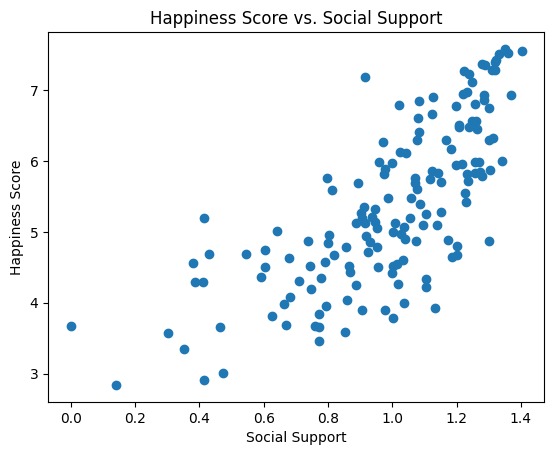

In [ ]:
plt.scatter(happy_df["Social Support"], happy_df["Happiness Score"])

plt.title("Happiness Score vs. Social Support")
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")

plt.show()

##### **Happiness Score vs. Freedom**

###### **Solution**

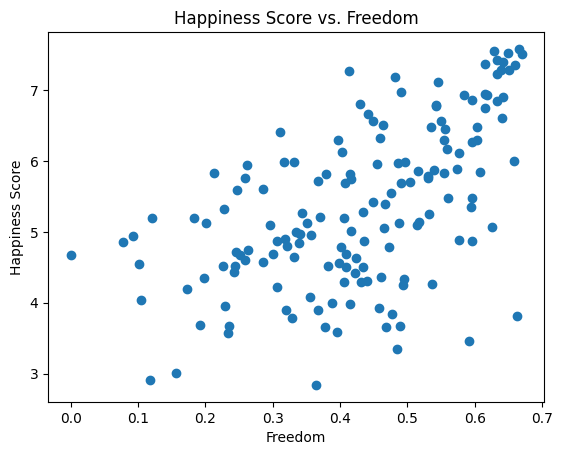

In [ ]:
plt.scatter(happy_df["Freedom"], happy_df["Happiness Score"])

plt.title("Happiness Score vs. Freedom")
plt.xlabel("Freedom")
plt.ylabel("Happiness Score")

plt.show()

##### **Happiness Score vs. GDP**

###### **Solution**

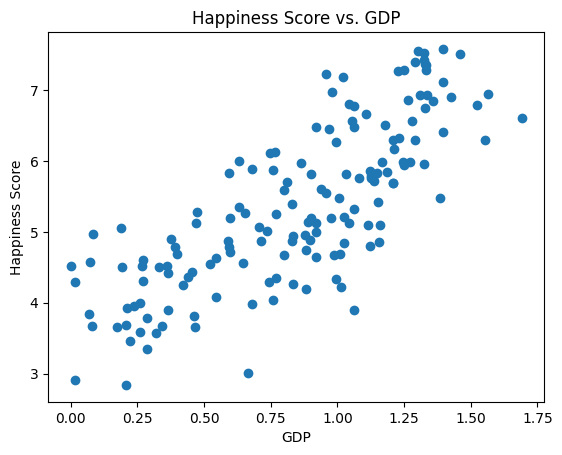

In [ ]:
plt.scatter(happy_df["GDP"], happy_df["Happiness Score"])

plt.title("Happiness Score vs. GDP")
plt.xlabel("GDP")
plt.ylabel("Happiness Score")

plt.show()

#### **Reflection Questions**

1. Is there a noticeable difference in happiness scores between different regions?
2. Does any region display a significant disparity between its country with the highest happiness score and its country with the lowest?
3. How do variables such as `Social Support`, `GDP`, and `Freedom` influence a country's happiness score? Do any variables seem to influence a country's happiness score more than others?
4. What are other relationships between variables that you think may be useful to visualize? What kind of data visualization graph would you use?
5. Consider the conceptual definitions of the features provided in the dataset. Are there any features that seem ambiguous or open to interpretation? How might these conceptual definitions impact the accuracy and reliability of the models when predicting happiness levels?
6. Reflect on the cultural and contextual factors that may influence the interpretation and relevance of the features in different countries. How might the meaning of a specific feature differ across diverse cultural and socioeconomic contexts?

##### **Solution**

1. North America has a higher average happiness score compared to Southern Asia and Middle East/Africa.
2. Countries in North America have the smallest distribution of happiness scores, while the Middle East and Africa has the largest gap between its countries with the highest and lowest happiness scores.
3. Social support and GDP appear to influence a country's happiness score more than freedom. It is difficult to reach a conclusion from only the visualization. Further data exploration is required.
4. It may be beneficial to visualize the happiness scores according to region using a bar graph. It may also be beneficial to create scatter plots to visualize the relationship between different features, as opposed to visualizing happiness score along with a single feature.
5. Some features in the dataset, such as "perceptions of corruption" or "freedom to make life choices," may be inherently subjective and open to interpretation. Different individuals or cultures may perceive and assess these concepts differently, which can introduce variability in the data and potentially affect the accuracy and reliability of the models. It's important to recognize and account for these subjective aspects during the modeling process.
6. The interpretation and relevance of features can vary across different countries and cultural contexts. For example, the meaning of "social support" may differ in collectivistic cultures that prioritize community and family ties compared to individualistic cultures that emphasize personal independence. Such cultural variations can impact the relationship between features and happiness levels, leading to variations in the predictive power of the models across diverse cultural and socioeconomic contexts.

<a name="p4.2"></a>

---
### **Part 4.2: Predicting Happiness Score**
---

Now you will create, evaluate, and train a machine learning model to predict the happiness score of a country based on the provided numerical features.

#### **Step #1: Load in the data**

This step was completed above.

#### **Step #2: Decide independent and dependent variables**

Complete the code below to decide the independent and dependent variables.

<br>

**NOTE**: The dependent variable (label) for all of Part 2 is `Happiness Score`. Using one of several pandas functions, you can determine the numerical features available and use them all as the independent variables.

In [ ]:
happy_df.# COMPLETE THIS LINE

In [ ]:
x = # COMPLETE THIS LINE
y = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
happy_df.dtypes

Country                     object
Region                      object
Happiness Score            float64
GDP                        float64
Social Support             float64
Healthy Life Expectancy    float64
Freedom                    float64
Corruption Perception      float64
Generosity                 float64
Region Encoded               int64
dtype: object

In [ ]:
x = happy_df.drop(columns = ['Country', 'Region', 'Happiness Score'], axis = 1)
y = happy_df['Happiness Score']

#### **Step #3: Split data into training and testing data**

Complete the code below to split the data, using 80% for training and 20% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS LINE

##### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#### **Step #4: Import the algorithm**

We are using `GDP`,	`Social Support`,	`Healthy Life Expectancy`, `Freedom`,	`Corruption Perception`, `Generosity`, and 	`Region Encoded` to predict `Happiness Score`. Which algorithm is best suited for this goal?

##### **Solution**

In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step #5: Initialize the model and set hyperparameters**

For linear regression, there are no hyperparameters to set.

In [ ]:
model_1 = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
model_1 = LinearRegression()

#### **Step #6: Fit your model and make a prediction.**

Create a visualization if applicable.

Specifically,

1. Fit the model to the training data and make predictions on the test data.
2. Visualize the results.

##### **1. Fit the model to the training data.**

In [ ]:
model_1.# COMPLETE THIS LINE TO TRAIN
predictions = model_1.# COMPLETE THIS LINE TO PREDICT

###### **Solution**

In [ ]:
model_1.fit(X_train, y_train)
predictions = model_1.predict(X_test)

##### **2. Visualize the results.**

Compare the true test values versus the predicted values.

###### **Solution**

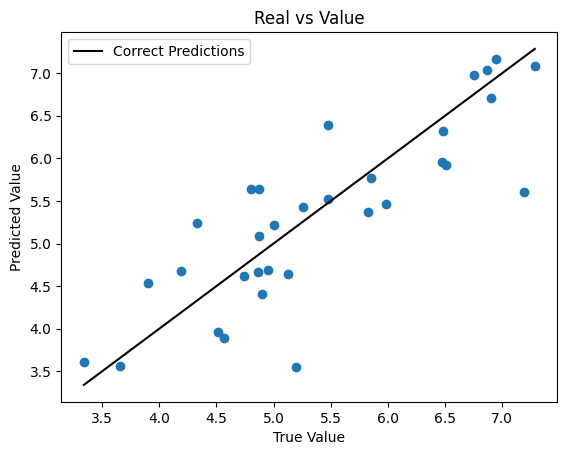

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

#### **Step #7: Evaluate the model's performance**

To complete this step, you will need to recall or find out what evaluation metrics we typically use for whichever type of model you have trained.

##### **Solution**

In [ ]:
print("R2: " + str(r2_score(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("MAE: " + str(mean_absolute_error(y_test, predictions)))

R2: 0.6725966134860057
MSE: 0.3646316886171512
MAE: 0.4652770191515724


#### **Step #8: Use the model**

Specifically,

1. Predict the happiness score of three countries that reported provided results for their numerical measures.

2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.

3. Look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the happiness score of these countries that reported the following results for their numerical measures:**

**Country 1**

* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09
* `Region Encoded`: 0

<br>

**Country 2**

* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09
* `Region Encoded`: 9

<br>

**Country 3**

* `GDP`: 1.1
* `Social Support`: 0.9
* `Healthy Life Expectancy`: 1.01
* `Freedom`: 0.9
* `Corruption Perception`: 0.1
* `Generosity`: 0.9
* `Region Encoded`: 4

In [ ]:
# COUNTRY 1
new_country = pd.DataFrame([[# COMPLETE THIS LINE]], columns = X_test.columns)

print(model_1.predict(# COMPLETE THIS LINE

In [ ]:
# COUNTRY 2
# COMPLETE THIS CODE

In [ ]:
# COUNTRY 3
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
# COUNTRY 1
new_country = pd.DataFrame([[0.9, 0.4, 0.8, 0.4, 0.2, 0.09, 0]], columns = X_test.columns)

print(model_1.predict(new_country))

[4.82783728]


In [ ]:
# COUNTRY 2
new_country = pd.DataFrame([[0.9, 0.4, 0.8, 0.4, 0.2, 0.09, 9]], columns = X_test.columns)

print(model_1.predict(new_country))

[4.26447233]


In [ ]:
# COUNTRY 3
new_country = pd.DataFrame([[1.1, 0.9, 1.01, 0.9, 0.1, 0.9, 4]], columns = X_test.columns)

print(model_1.predict(new_country))

[6.52831249]


##### **2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.**

###### **Solution**

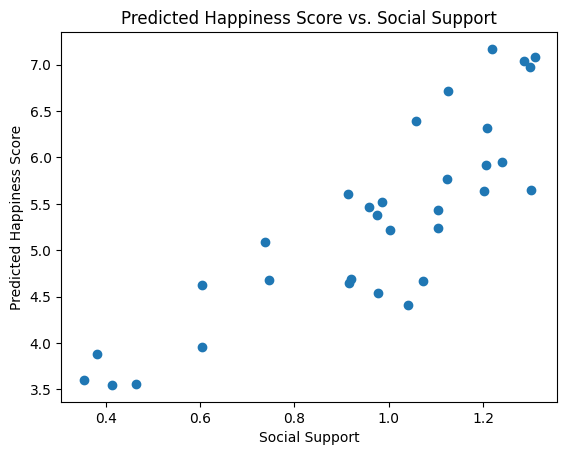

In [ ]:
plt.scatter(X_test["Social Support"], predictions)

plt.title("Predicted Happiness Score vs. Social Support")
plt.xlabel("Social Support")
plt.ylabel("Predicted Happiness Score")

plt.show()

##### **3. Complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model_1.# COMPLETE THIS LINE
intercept = model_1.# COMPLETE THIS LINE

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Happiness Score"])

In [ ]:
print("Coefficients:")
coefficients.head()

In [ ]:
print("\nIntercept:")
intercept.head()

###### **Solution**

In [ ]:
coefficients = model_1.coef_
intercept = model_1.intercept_

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Happiness Score"])

In [ ]:
print("Coefficients:")
coefficients.head()

Coefficients:


,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption Perception,Generosity,Region Encoded
0,0.833614,1.524989,0.442303,1.387252,0.64792,0.370277,-0.062596


In [ ]:
print("\nIntercept:")
intercept.head()


Intercept:


,Happiness Score
0,2.395936


---
#End of Notebook

© 2023 The Coding School, All rights reserved